<a href="https://colab.research.google.com/github/Jeongyoon-Jang/covid19_data_analysis/blob/main/2020%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/seouldata/test_f.csv")
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/seouldata/train_data_f.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/seouldata/train_f.csv")

In [ ]:
# 타겟 변수를 상권변화지표로 설정

In [ ]:
target=train['상권_변화_지표']

In [ ]:
train

,총_유동인구_수,당월_매출_금액,당월_매출_건수,점포_수,개업_점포_수,폐업_점포_수,집객시설_수,총_직장_인구_수,아파트_단지_수,상권_변화_지표
0,0.023829,0.003046,0.009839,0.010968,0.028777,0.011881,0.020236,0.001717,0.014831,1.0
1,0.102332,0.004390,0.010833,0.005006,0.014388,0.007921,0.008432,0.000534,0.036017,1.0
2,0.023757,0.001256,0.002584,0.004637,0.007194,0.005941,0.011804,0.003262,0.008475,1.0
3,0.243219,0.020746,0.036029,0.024218,0.079137,0.019802,0.013491,0.017648,0.186441,1.0
4,0.003545,0.011013,0.009827,0.011189,0.057554,0.007921,0.052277,0.025785,0.002119,1.0
...,...,...,...,...,...,...,...,...,...,...
3113,0.070407,0.011397,0.047163,0.008171,0.028777,0.015842,0.010118,0.001431,0.016949,1.0
3114,0.046462,0.013356,0.023967,0.011999,0.007194,0.001980,0.013491,0.004226,0.014831,1.0
3115,0.213356,0.004697,0.012760,0.009275,0.014388,0.007921,0.023609,0.001984,0.031780,1.0
3116,0.011394,0.882935,0.129503,0.071034,0.035971,0.023762,0.011804,0.003739,0.002119,1.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총_유동인구_수   3118 non-null   float64
 1   당월_매출_금액   3118 non-null   float64
 2   당월_매출_건수   3118 non-null   float64
 3   점포_수       3118 non-null   float64
 4   개업_점포_수    3118 non-null   float64
 5   폐업_점포_수    3118 non-null   float64
 6   집객시설_수     3118 non-null   float64
 7   총_직장_인구_수  3118 non-null   float64
 8   아파트_단지_수   3118 non-null   float64
 9   상권_변화_지표   3118 non-null   float64
dtypes: float64(10)
memory usage: 243.7 KB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총_유동인구_수   3118 non-null   float64
 1   당월_매출_금액   3118 non-null   float64
 2   당월_매출_건수   3118 non-null   float64
 3   점포_수       3118 non-null   float64
 4   개업_점포_수    3118 non-null   float64
 5   폐업_점포_수    3118 non-null   float64
 6   집객시설_수     3118 non-null   float64
 7   총_직장_인구_수  3118 non-null   float64
 8   아파트_단지_수   3118 non-null   float64
dtypes: float64(9)
memory usage: 219.4 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준_년_코드    1336 non-null   int64  
 1   기준_분기_코드   1336 non-null   int64  
 2   상권_코드      1336 non-null   int64  
 3   상권_코드_명    1336 non-null   object 
 4   총_유동인구_수   1336 non-null   float64
 5   당월_매출_금액   1336 non-null   float64
 6   당월_매출_건수   1336 non-null   float64
 7   점포_수       1336 non-null   float64
 8   개업_점포_수    1336 non-null   float64
 9   폐업_점포_수    1336 non-null   float64
 10  집객시설_수     1336 non-null   float64
 11  총_직장_인구_수  1336 non-null   float64
 12  아파트_단지_수   1336 non-null   float64
 13  상권_변화_지표   1336 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 146.2+ KB


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# knn
clf=KNeighborsClassifier(n_neighbors=4)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.76923077 0.76602564 0.79807692 0.75641026 0.78846154 0.75641026
 0.79487179 0.73717949 0.75562701 0.78456592]


77.07

In [ ]:
# decisiontree
clf=DecisionTreeClassifier(max_depth=5)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.85576923 0.8525641  0.82371795 0.77884615 0.80128205 0.78846154
 0.83974359 0.78525641 0.81672026 0.82958199]


81.72

In [ ]:
#random forest
clf=RandomForestClassifier(n_estimators=3,max_depth=5)
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.85897436 0.85576923 0.83653846 0.78525641 0.81089744 0.77884615
 0.83333333 0.79166667 0.82315113 0.82315113]


81.98

In [ ]:
#naive bayes
clf=GaussianNB()
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.24679487 0.24358974 0.22435897 0.32051282 0.24038462 0.30448718
 0.26282051 0.30448718 0.25401929 0.27652733]


26.78

In [ ]:
#svm
clf=SVC()
scoring='accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.86217949 0.85576923 0.83333333 0.78846154 0.80769231 0.77884615
 0.83974359 0.78846154 0.81993569 0.83279743]


82.07

In [ ]:
# test - decision tree

In [ ]:
clf=DecisionTreeClassifier()#max_depth=5)
clf.fit(train_data,target)
test_data=test.drop(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명','상권_변화_지표'], axis=1).copy()
prediction=clf.predict(test_data)

In [ ]:
# test - random forest

In [ ]:
clf=RandomForestClassifier(n_estimators=5)#,max_depth=5)
clf.fit(train_data,target)
scoring='accuracy'
test_data=test.drop(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명','상권_변화_지표'], axis=1).copy()
prediction=clf.predict(test_data)

submission=pd.DataFrame({'상권_코드_명':test['상권_코드_명'],'상권변화지표':prediction})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/seouldata/submission20.csv',index=False)

submission=pd.read_csv('/content/drive/My Drive/Colab Notebooks/seouldata/submission20.csv')

In [ ]:
sub=pd.DataFrame(submission['상권변화지표'])
testy=pd.DataFrame(test['상권_변화_지표'])

In [ ]:
df=pd.concat([sub, testy],axis=1)
df['scorey']=(df['상권변화지표']==df['상권_변화_지표'])
df['scorey'].value_counts()

True     1191
False     145
Name: scorey, dtype: int64

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/seouldata/submission20.csv')
submission

,상권_코드_명,상권변화지표
0,서울 서초구 방배역,1.0
1,방화대로6라길,1.0
2,개포로28길,0.0
3,통일로39길,0.0
4,강서로5라길,1.0
...,...,...
1331,행당시장,0.0
1332,남부순환로142길,0.0
1333,장충동 족발거리,1.0
1334,성균관로5길,1.0


In [ ]:
# decision tree 시각화

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

import pandas as pd
import numpy as np
import pydotplus 
import os

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/seouldata/data2020_3.csv")
data=data.dropna(axis=0)
data_colname=data.drop(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'],axis=1)
data_colname=data_colname.dropna(axis=0)
data_colname.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총_유동인구_수   4455 non-null   float64
 1   당월_매출_금액   4455 non-null   float64
 2   당월_매출_건수   4455 non-null   float64
 3   점포_수       4455 non-null   int64  
 4   개업_점포_수    4455 non-null   int64  
 5   폐업_점포_수    4455 non-null   int64  
 6   집객시설_수     4455 non-null   float64
 7   총_직장_인구_수  4455 non-null   float64
 8   아파트_단지_수   4455 non-null   float64
 9   상권_변화_지표   4455 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 382.9 KB


In [ ]:
# 변수들
data_colname.columns=['people','month_money','month_cases','store','open_store','closed_store','guest_facilities','work_population','apartment','largeorsmall']

In [ ]:
data_colname.head()
data_colname.info()
X=np.array(pd.DataFrame(data_colname,columns=['people','month_money','month_cases','store','open_store','closed_store','guest_facilities','work_population','apartment']))
y=np.array(pd.DataFrame(data_colname,columns=['largeorsmall']))
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   people            4455 non-null   float64
 1   month_money       4455 non-null   float64
 2   month_cases       4455 non-null   float64
 3   store             4455 non-null   int64  
 4   open_store        4455 non-null   int64  
 5   closed_store      4455 non-null   int64  
 6   guest_facilities  4455 non-null   float64
 7   work_population   4455 non-null   float64
 8   apartment         4455 non-null   float64
 9   largeorsmall      4455 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 382.9 KB


array([[6.50257000e+05, 3.23628729e+10, 1.26862100e+06, ...,
        6.60000000e+01, 1.40000000e+02, 3.00000000e+00],
       [1.16048000e+05, 1.52977173e+09, 6.35760000e+04, ...,
        2.40000000e+01, 6.71000000e+02, 3.00000000e+00],
       [7.70732000e+05, 2.26586274e+09, 2.38077000e+05, ...,
        9.00000000e+00, 3.09000000e+02, 6.50000000e+01],
       ...,
       [6.52208000e+05, 2.70040417e+09, 9.98220000e+04, ...,
        1.00000000e+01, 2.45000000e+02, 6.30000000e+01],
       [4.69840000e+04, 2.20263270e+09, 8.59930000e+04, ...,
        0.00000000e+00, 5.80000000e+01, 1.00000000e+00],
       [4.90556000e+05, 5.43968584e+09, 2.25205000e+05, ...,
        1.80000000e+01, 5.69000000e+02, 6.00000000e+00]])

In [ ]:
#학습-PRUNING
dt_clf = DecisionTreeClassifier(criterion = "entropy")
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [ ]:
#그래프
!pip install graphviz

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
feature_names = data_colname.columns.tolist()
feature_names = feature_names[0:9]

In [ ]:
feature_names

['people',
 'month_money',
 'month_cases',
 'store',
 'open_store',
 'closed_store',
 'guest_facilities',
 'work_population',
 'apartment']

In [ ]:
target_name = np.array(['large', 'small'])
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  max_depth = 5)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

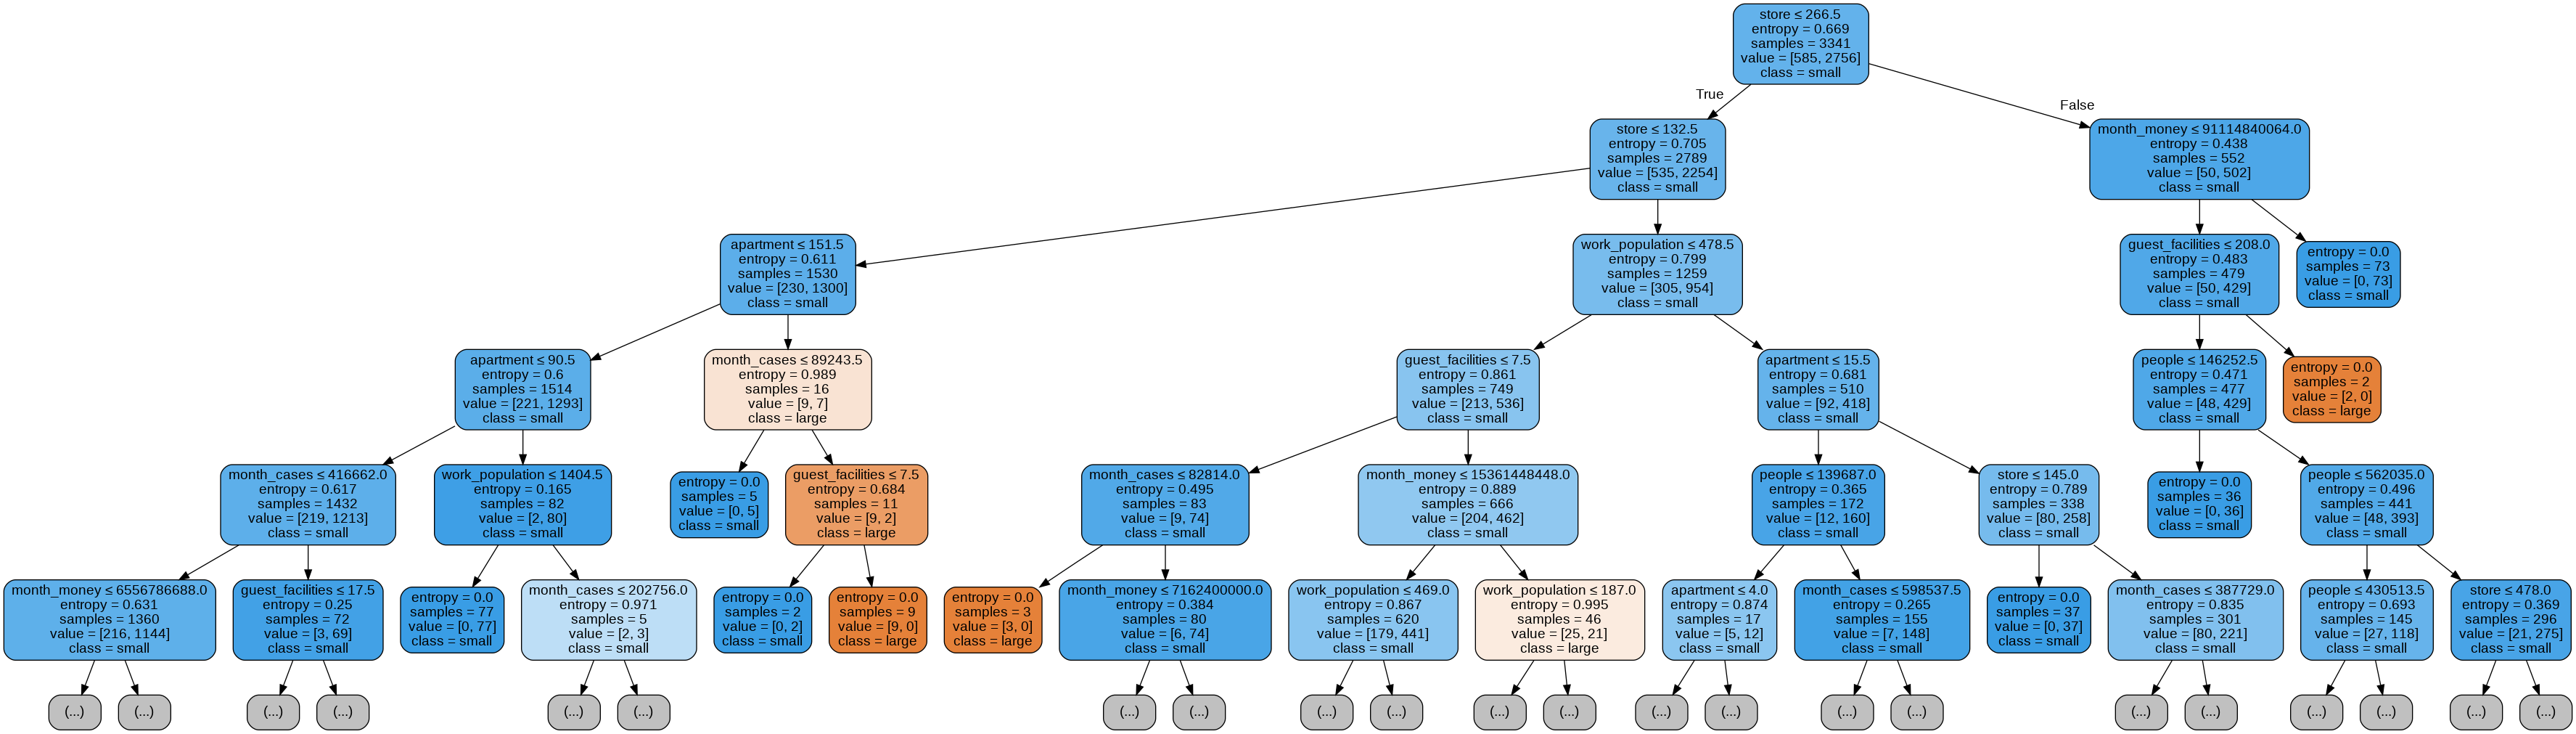

In [ ]:
Image(dt_graph.create_png())

In [ ]:
# random forest 시각화

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image

In [ ]:
import pandas as pd
import numpy as np
import pydotplus 
import os

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/seouldata/data2020_3.csv")
data=data.dropna(axis=0)
data_colname=data.drop(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'],axis=1)
data_colname=data_colname.dropna(axis=0)
data_colname.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총_유동인구_수   4455 non-null   float64
 1   당월_매출_금액   4455 non-null   float64
 2   당월_매출_건수   4455 non-null   float64
 3   점포_수       4455 non-null   int64  
 4   개업_점포_수    4455 non-null   int64  
 5   폐업_점포_수    4455 non-null   int64  
 6   집객시설_수     4455 non-null   float64
 7   총_직장_인구_수  4455 non-null   float64
 8   아파트_단지_수   4455 non-null   float64
 9   상권_변화_지표   4455 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 382.9 KB


In [ ]:
data_colname.columns=['people','month_money','month_cases','store','open_store','closed_store','guest_facilities','work_population','apartment','largeorsmall']
data_colname.head()

,people,month_money,month_cases,store,open_store,closed_store,guest_facilities,work_population,apartment,largeorsmall
0,97662.0,1.593962e+11,3812231.0,872,7,26,52.0,15904.0,0.0,1
1,2998786.0,1.636661e+11,5797609.0,2241,47,63,242.0,24375.0,22.0,1
2,3815342.0,2.242585e+11,6347857.0,5235,78,128,327.0,32935.0,5.0,1
3,3023573.0,2.075928e+11,8255154.0,13005,64,431,165.0,6054.0,8.0,1
4,3679541.0,3.178023e+11,12461009.0,8693,106,257,593.0,104830.0,0.0,1


In [ ]:
X=np.array(pd.DataFrame(data_colname,columns=['people','month_money','month_cases','store','open_store','closed_store','guest_facilities','work_population','apartment']))
y=np.array(pd.DataFrame(data_colname,columns=['largeorsmall']))
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[2.80771000e+05, 5.21496002e+09, 2.00281000e+05, ...,
        8.00000000e+00, 2.30000000e+01, 7.00000000e+00],
       [2.89316000e+05, 6.68800924e+09, 3.89853000e+05, ...,
        2.20000000e+01, 3.18500000e+03, 1.00000000e+00],
       [4.37150000e+04, 9.37168200e+07, 3.13400000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.40271000e+05, 8.26063496e+10, 3.51546800e+06, ...,
        6.30000000e+01, 2.51940000e+04, 4.00000000e+00],
       [3.47295000e+05, 4.55607117e+09, 2.43331000e+05, ...,
        1.80000000e+01, 1.21000000e+02, 4.00000000e+00],
       [2.24133000e+05, 1.71738288e+10, 5.39929000e+05, ...,
        4.60000000e+01, 1.37600000e+03, 2.00000000e+00]])

In [ ]:
#학습-PRUNING
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)
#extract single tree
estimator = rf_clf.estimators_[5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
feature_names = data_colname.columns.tolist()
feature_names = feature_names[0:9]

In [ ]:
target_name = np.array(['large', 'small'])

In [ ]:
#그래프
!pip install graphviz

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
# Export
rf_dot_data=export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_name,
                rounded = True, proportion = False, 
                precision = 2, #소숫점자리수
                filled = True,
                special_characters = True,
                max_depth=5)

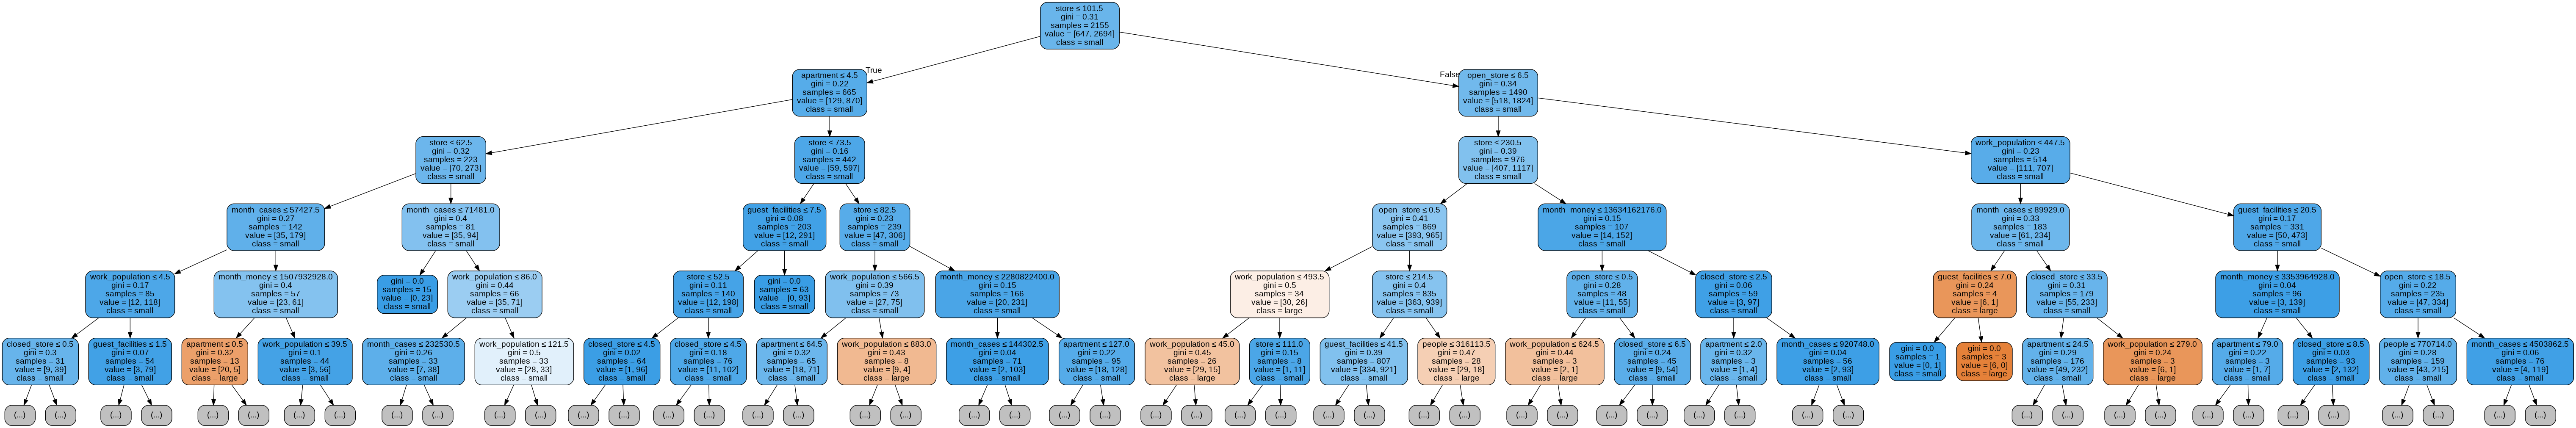

In [ ]:
rf_graph = pydotplus.graph_from_dot_data(rf_dot_data)
Image(rf_graph.create_png())